# K-Means Algorithm

- Specify the number of clusters you want.
- We randomly assign the datapoints as the cluster centers.
- Calculate the distance of all the datapoints from each cluster centers.
- Based on the minimum distance, we assign the datapoints to that cluster.
- Update the cluster centers.
- Keep on repeating this process, until no further reassignment is happening.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
rng = np.random.default_rng(seed = 138)

## Toy Dataset

As before, let us generate a toy dataset.

In [ ]:
mus = np.array([
    [-3, 3],
    [3, -3],
    [3, 3]
])
cov = np.eye(2)
n = 60
xvals = [rng.multivariate_normal(
    mus[i], cov, size = n // 3)
    for i in range(3)]

X = np.concatenate(xvals, axis = 0).T
X = X.astype(np.float32)
X.shape

(2, 60)

### Visualize the dataset

As before, let us visualize the dataset using a scatter plot.

(np.float64(-5.186849546432495),
 np.float64(6.154885244369507),
 np.float64(-4.8857441425323485),
 np.float64(5.386966753005981))

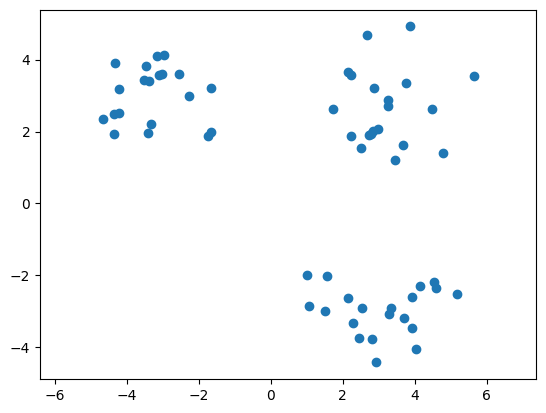

In [ ]:
plt.scatter(X[0, :], X[1, :])
plt.axis('equal')

## Step-1: Initialization

Let us choose $k$ points uniformly at random from the dataset and call them the $k$ initial means. For this example, we shall use $k = 3$.

In [ ]:
k = 3
d, n = X.shape
ind = rng.choice(
    np.arange(n),
    size = k,
    replace = False
)
mus = X[:, ind]
mus.shape

(2, 3)

`mus[:, j]` gives the mean of the $j^{th}$ cluster. The array `mus` is of shape $d \times k$. Each column corresponds to a mean.

## Step-2: Cluster Assignment

We will now compute the cluster closest to each point in the dataset and store them in the array $\mathbf{z}$. Clusters are indexed from $0$ to $k - 1$.

In [ ]:
z = np.zeros(n)
for i in range(n):
    dist = np.linalg.norm(
        mus - X[:, i].reshape(d, 1),
        axis = 0
    )
    z[i] = np.argmin(dist)

## Step-3: Cluster centers

It is now time to recompute the cluster centers. If a cluster has at least one (actually two) point assigned to it, we need to update its center to the mean of all points assigned to it.*italicised text*

In [ ]:
for j in range(k):
    if np.any(z == j):
        mus[:, j] = X[:, z == j].mean(axis = 1)

## K-means function

We now have all the ingredients to turn this into a function. We need to loop through steps two and three until convergence. Recall that k-means always converges. The convergence criterion is to stop iterating when the cluster assignments do not change. To help with this, we will introduce a new array, `z_prev`, that keeps track of the previous cluster assignment.


In [ ]:
def k_means(X, k = 3):
    d, n = X.shape
    # Step-1: Initialization
    ind = rng.choice(
        np.arange(n),
        size = k,
        replace = False
        )
    mus = X[:, ind]
    z_prev, z = np.zeros(n), np.ones(n)
    while not np.array_equal(z_prev, z):
        z_prev = z.copy()
        # Step-2: Cluster Assignment
        for i in range(n):
            dist = np.linalg.norm(
                mus - X[:, i].reshape(d, 1),
                axis = 0
                )
            z[i] = np.argmin(dist)
        # Step-3: Compute centers
        for j in range(k):
            if np.any(z == j):
                mus[:, j] = X[:, z == j].mean(axis = 1)
    return z.astype(np.int8), mus

### Visualize

Let us now visualize the clusters we have obtained by running k-means on the toy dataset. The cluster centers are represented in black color.

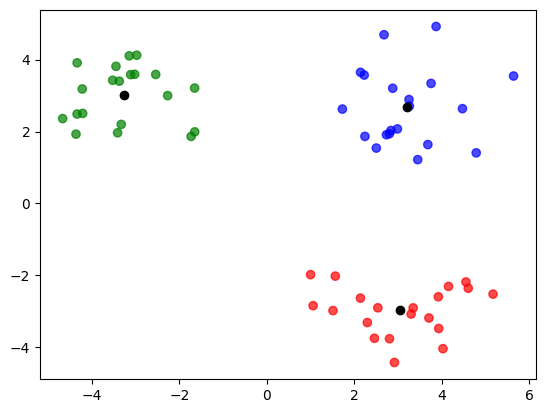

In [ ]:
z, mus = k_means(X)
colors = np.array(['red', 'green', 'blue'])
plt.scatter(
    X[0, :],
    X[1, :],
    c = colors[z],
    alpha = 0.7
    )
plt.scatter(
    mus[0, :],
    mus[1, :],
    color = 'black');

A few additional points related to `NumPy`. `z_prev.copy()` does a deep copy in NumPy. To see why we need a deep copy, consider:

In [ ]:
a = np.array([1, 2, 3])
b = a
b[0] += 100
print(a, b)

[101   2   3] [101   2   3]


Notice how both `a` and `b` change when only `b` is updated. This is because, both `a` and `b` point to the same object. To avoid this, we have:

In [ ]:
a = np.array([1, 2, 3])
b = np.copy(a)
b[0] += 100
print(a, b)

[1 2 3] [101   2   3]


The `astype` method allows us to typecast arrays.

In [ ]:
a = np.array([1, 2, 3])
print(a.dtype)
a = a.astype(np.float32)
print(a.dtype)

int64
float32
